In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
filename ="data/diabetes.csv"
df=pd.read_csv(filename)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Limpieza de Datos

Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [121]:
#Detección y eliminación de valores duplicados
df = df.drop_duplicates()
df.info()
#No se detecto ningun valor duplicado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [123]:

columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_fix:
    median_value = df[col][df[col] != 0].median() 
    df[col] = df[col].replace(0, median_value)  


In [125]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
# Selectores de columnas por tipos. También es posible utilizar patrones de expresiones
# regulares para selección de columnas
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html
cat_selector = make_column_selector(dtype_include='object') # Este selector se enfocará en columnas nominales
num_selector = make_column_selector(dtype_include='number') # Este selector se enfocará en columnas numéricas

# Transformadores
one_hot_encoder = OneHotEncoder() # Variable encargada de las transformaciones one hot
standard_scaler = StandardScaler() # Variable encargada de las transformaciones de estandarización

# Transformación
col_transformer = make_column_transformer((standard_scaler, num_selector),
                                          (one_hot_encoder, cat_selector), 
                        remainder = 'passthrough') # Si existe alguna columna que no caiga en las categorías, pasa tal cual

# col_transformer es la variable que se encargará de realizar todas las operaciones sobre cada subconjunto de columnas escogido
# según cada column selector.

# Recuerden que col_transformer.fit_transform(df) es una forma abreviada de escribir
# col_transformer.fit(df) # Aquí estimamos los parámetros para todas las transformaciones
# col_transformer.transform(df) # Aquí aplicamos dichas transformaciones sobre el dataframe
df_encoded = pd.DataFrame(col_transformer.fit_transform(df))
df_encoded.info()
# También es posible utilizar la clase ColumnTransform la cual es mucho más versátil
# que la función make_column_transformer

#Datos ajustados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    float64
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    float64
 8   8       768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [127]:

df_encoded.head()

,0,1,2,3,4,5,6,7,8
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1.365896
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,-0.732120
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1.365896
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1.365896


In [129]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [51]:
#no he encontrado ninguna anormalidad

# Exploración de Datos


Visualizaciones univariadas y multivariadas

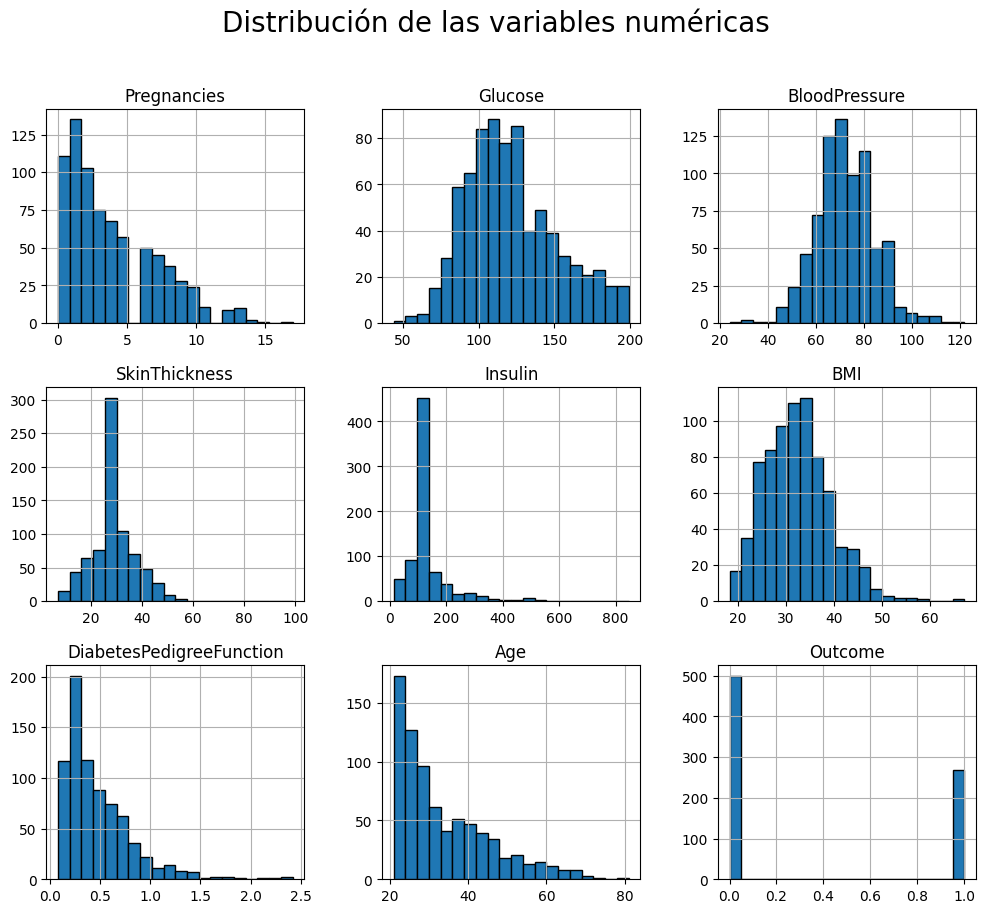

In [131]:
# histogramas
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=20)
plt.show()


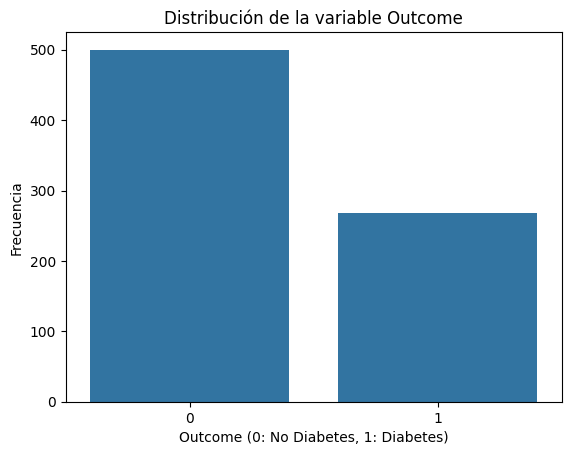

In [133]:
# grafico de barras
sns.countplot(data=df, x='Outcome')
plt.title("Distribución de la variable Outcome")
plt.xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
plt.ylabel("Frecuencia")
plt.show()


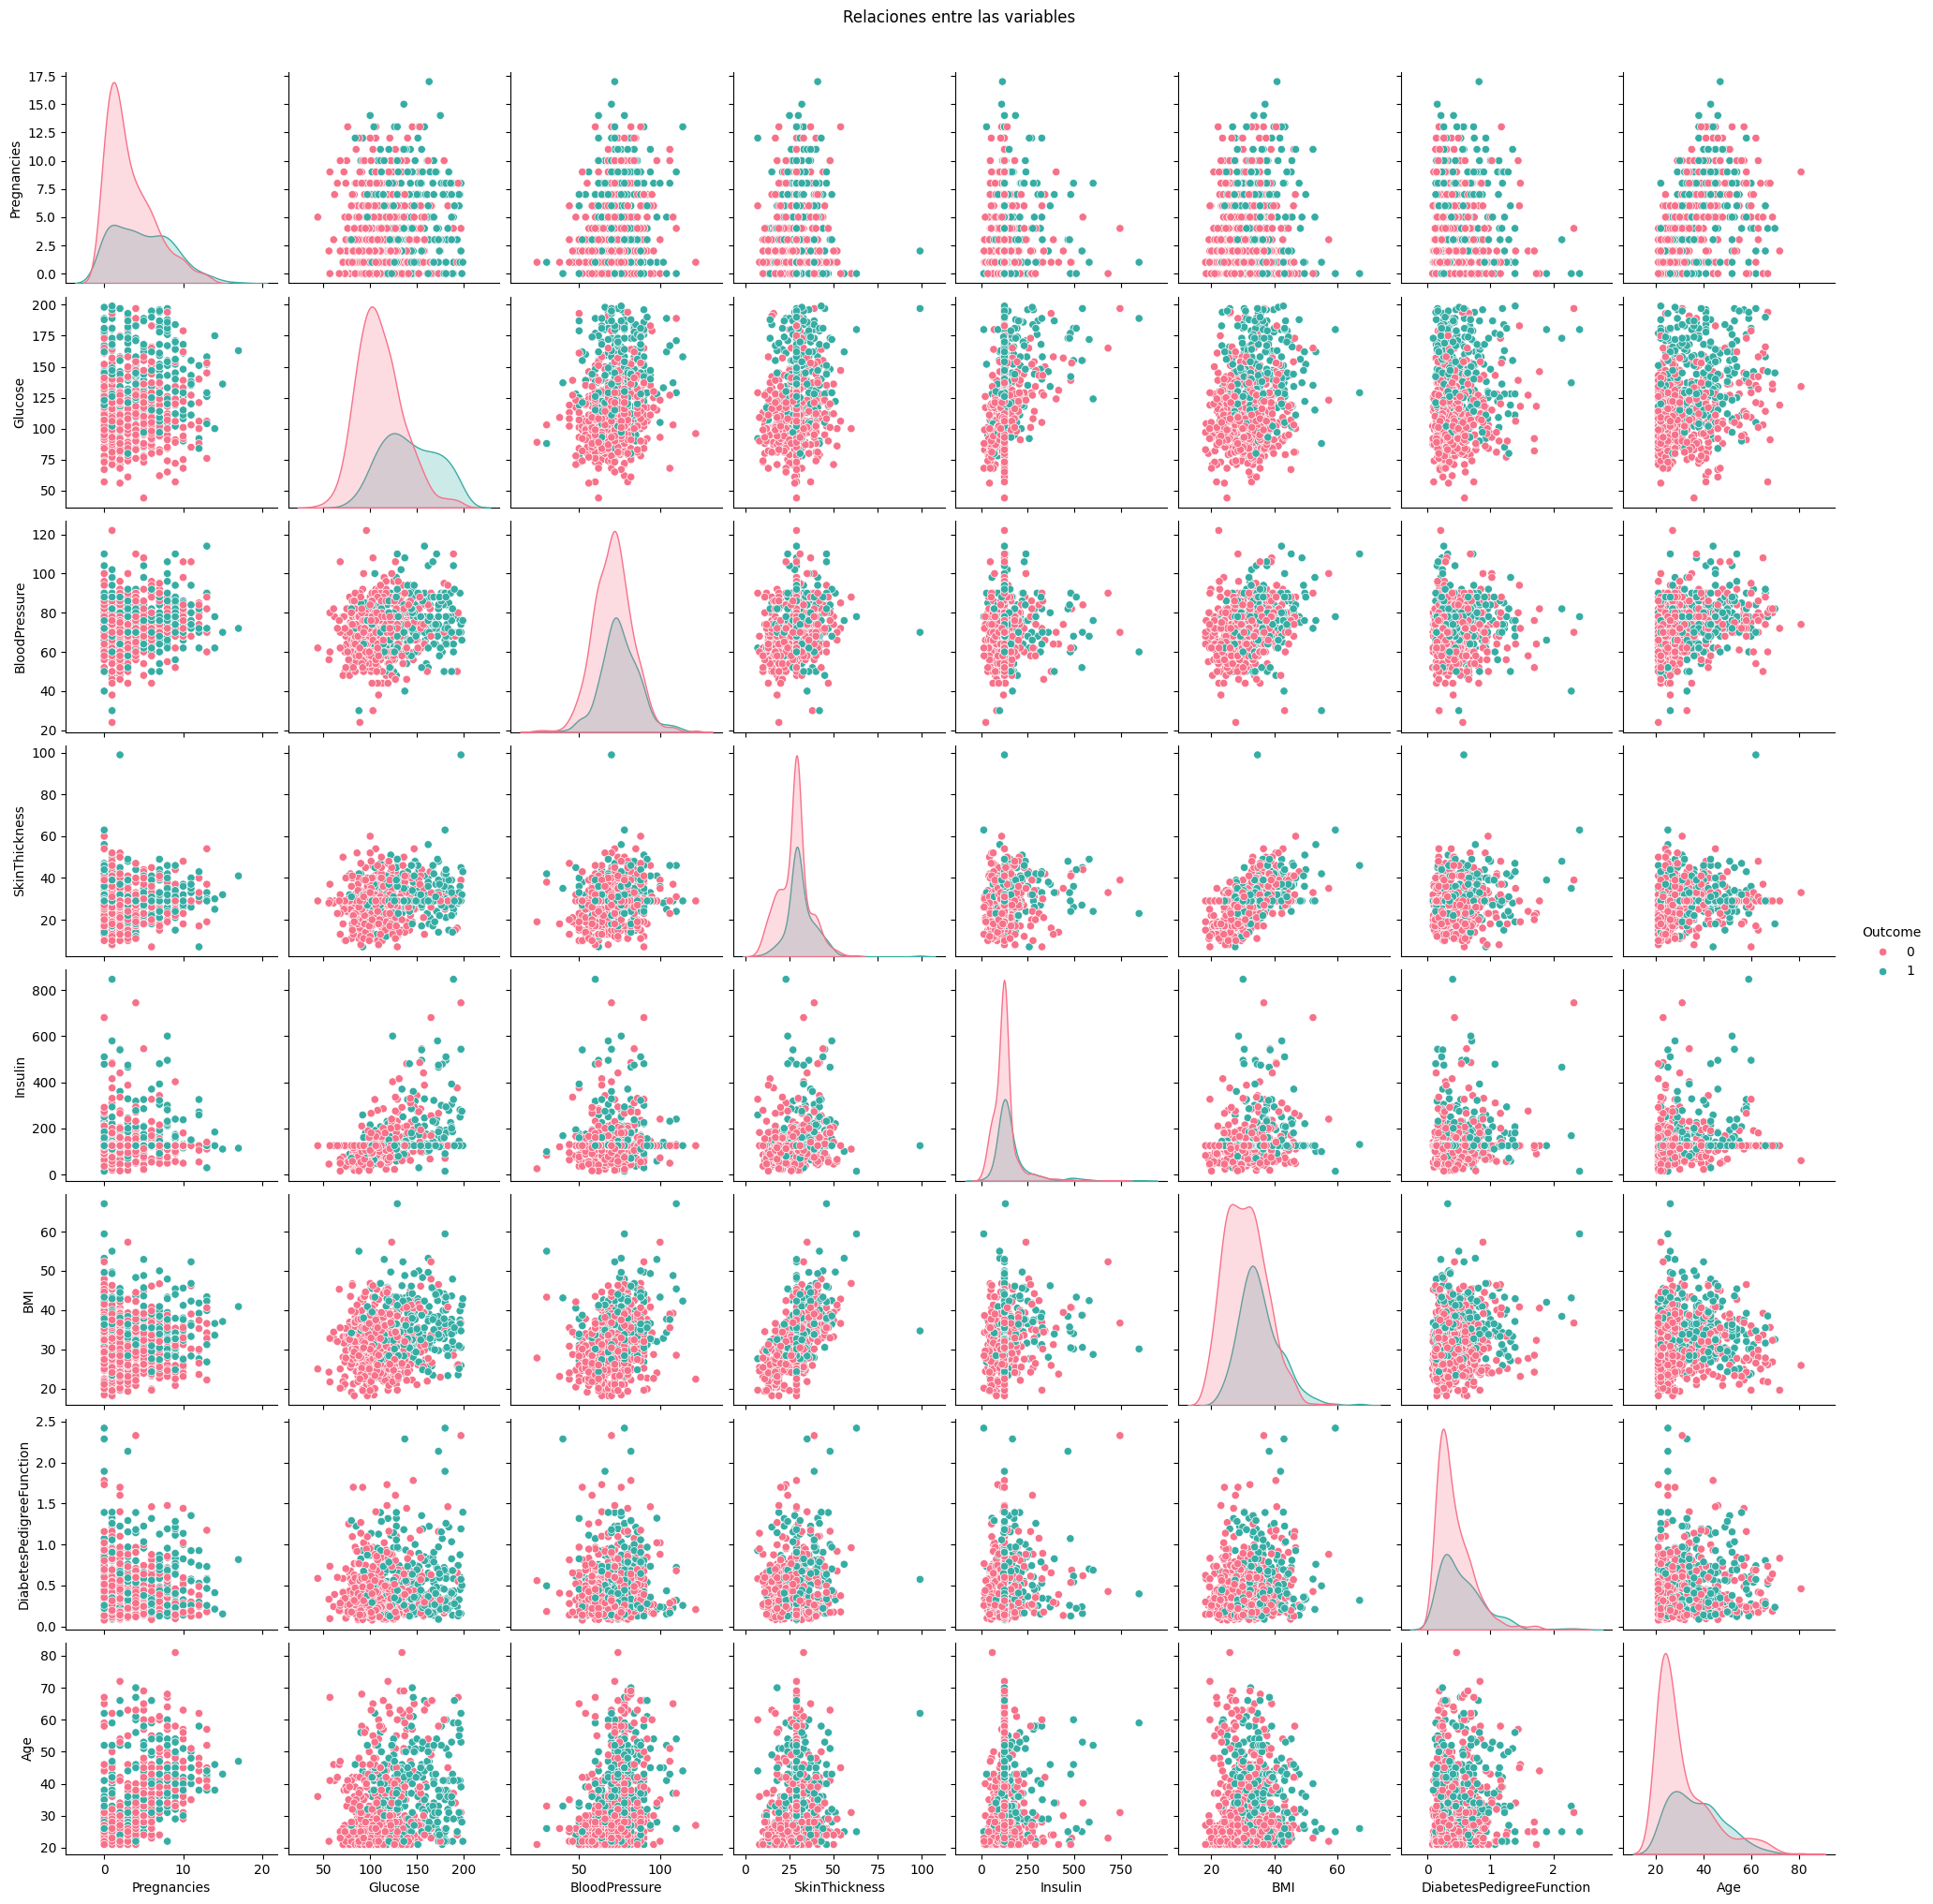

In [135]:
# diagramas de dispersión
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='husl')
plt.suptitle("Relaciones entre las variables", y=1.02)
plt.show()

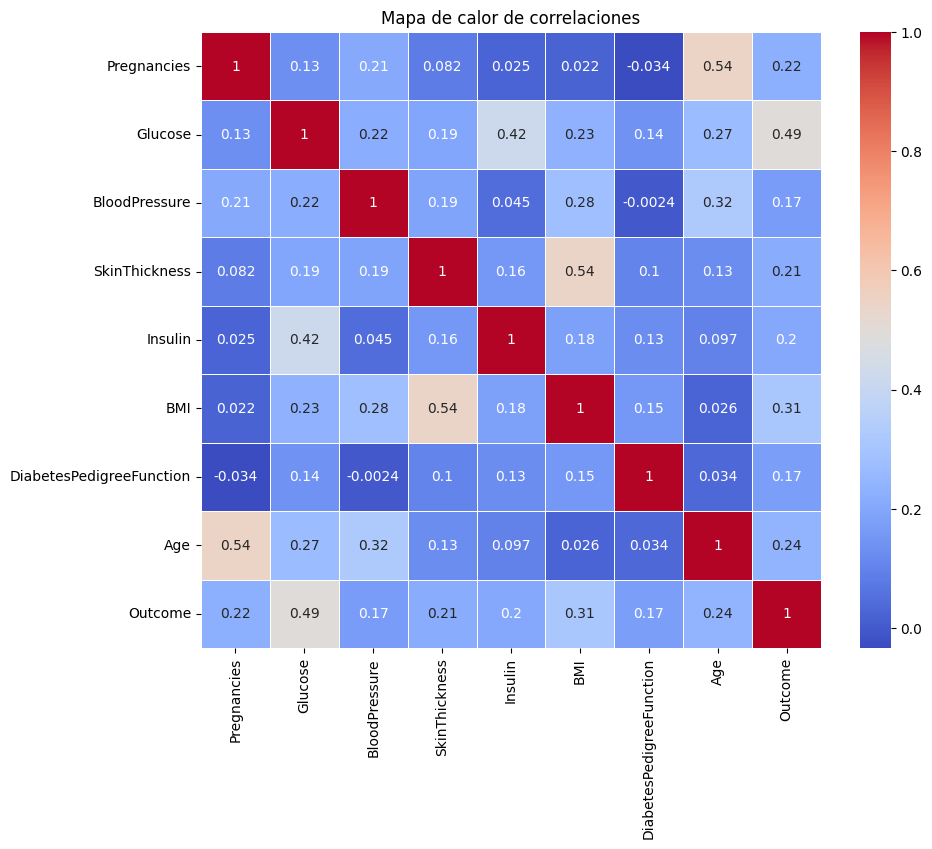

In [136]:
#mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

# Estadísticas descriptivas: 
Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [138]:
estadistica = df.describe().T
estadistica

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [139]:
# Mediana
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [142]:
# Modas
df.mode().iloc[0]

Pregnancies                   1.000
Glucose                      99.000
BloodPressure                72.000
SkinThickness                29.000
Insulin                     125.000
BMI                          32.300
DiabetesPedigreeFunction      0.254
Age                          22.000
Outcome                       0.000
Name: 0, dtype: float64

# Implementación de Modelos

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [149]:
# Random Forest
modelo_forest = RandomForestClassifier(random_state=42)
modelo_forest.fit(X_train, y_train)
prediciones_forest = modelo_forest.predict(X_test)
probabilidades_forest= modelo_forest.predict_proba(X_test)[:, 1]

In [151]:
# XGBoost
modelo_xgb = XGBClassifier(eval_metric='logloss', random_state=42)
modelo_xgb.fit(X_train, y_train)
prediciones_xgb = modelo_xgb.predict(X_test)
probabilidades_xgb = modelo_xgb.predict_proba(X_test)[:, 1]

In [153]:
#metricas
def evaluate_model(y_test, prediciones, probabilidades):
    metricas = {
        "Accuracy": accuracy_score(y_test, prediciones),
        "Precision": precision_score(y_test, prediciones),
        "Recall": recall_score(y_test, prediciones),
        "F1-Score": f1_score(y_test, prediciones),
        "ROC-AUC": roc_auc_score(y_test, probabilidades)
    }
    return metricas

In [155]:
# evalucion random forest
metricas_forest = evaluate_model(y_test, prediciones_forest, probabilidades_forest)
metricas_forest

{'Accuracy': 0.7402597402597403,
 'Precision': 0.6666666666666666,
 'Recall': 0.5185185185185185,
 'F1-Score': 0.5833333333333334,
 'ROC-AUC': 0.8158847736625514}

In [157]:
#Evalucion XGBoost
metricas_xgb = evaluate_model(y_test, prediciones_xgb, probabilidades_xgb)
metricas_xgb

{'Accuracy': 0.7532467532467533,
 'Precision': 0.6666666666666666,
 'Recall': 0.5925925925925926,
 'F1-Score': 0.6274509803921569,
 'ROC-AUC': 0.8048559670781892}

In [159]:
#Si bien ambos modelos son competentes, XGBoost se destaca ligeramente al ofrecer mejores métricas de evaluación.
#Su superioridad en precisión, F1-Score y sensibilidad, lo convierte en el candidato ideal para este conjunto de datos.

In [ ]:
#fuente
#muchas partes de este codigo es basado a las dos pruebas anteriores resueltas de este modulo.
#tambien codigo prehecho y posteriormente editado por mi para esta prueba de la pagina principal de dojo coding latam